In [13]:
import re
import aacdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# # create dataframes
df_intakes = aacdata.clean_intake_data('data/Austin_Animal_Center_Intakes.csv')
df_outcomes = aacdata.clean_outcome_data('data/Austin_Animal_Center_Outcomes.csv')
df_combined = aacdata.combine_intake_outcome(df_intakes, df_outcomes)
df_combined_deduped = aacdata.remove_duplicate_animals(df_combined)

# #save cleaned data as csv
# df_intakes.to_csv('df_intake.csv')
# df_outcomes.to_csv('df_outcome.csv')
# df_combined.to_csv('df_combined.csv')
# df_combined_deduped.to_csv('df_combined_deduped.csv')

# df_intakes = pd.read_csv('df_intake.csv')
# df_outcomes = pd.read_csv('df_outcome.csv')
# df_combined = pd.read_csv('df_combined.csv')
# df_combined_deduped = pd.read_csv('df_combined_deduped.csv')

color = ['xkcd:teal', 'xkcd:orange', 'xkcd:yellow','xkcd:light green', 'xkcd:magenta', 'xkcd:light blue']

In [14]:
df_intake = pd.read_csv('df_intake.csv')
df_outcome = pd.read_csv('df_outcome.csv')
df_combined = pd.read_csv('df_combined.csv')
df_combined_nodup = aacdata.remove_duplicate_animals(df_combined)

In [15]:
df_intakes.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color,Intake Month,Intake Year,Gender,Intake Age in Months
0,A797402,Seven Halo,08/27/2019 07:42:00 PM,4614 Sojourner in Travis (TX),Public Assist,Normal,Dog,4 months,Border Terrier Mix,Tricolor,8,2019,Male,4
1,A803130,Kojack,08/27/2019 07:42:00 PM,4614 Sojourner in Travis (TX),Public Assist,Normal,Dog,2 years,German Shepherd,Black/Blue Tick,8,2019,Male,24
2,A803129,NaN,08/27/2019 06:53:00 PM,7309 Carver Avenue in Austin (TX),Stray,Normal,Dog,4 years,German Shepherd,Black/Tricolor,8,2019,Female,48
3,A803125,NaN,08/27/2019 06:41:00 PM,Brackenridge in Austin (TX),Stray,Normal,Dog,5 years,Great Pyrenees,White,8,2019,Male,60
4,A803126,NaN,08/27/2019 06:32:00 PM,Meander Lane And Webberville in Austin (TX),Stray,Normal,Dog,5 months,Labrador Retriever/Beagle,Black/White,8,2019,Female,5


## What type of animals are brought into the shelter and for what reasons?

In [16]:
# see the count of animals brought into center by animal type
df_intakes['Animal Type'].value_counts()

Dog          60671
Cat          40269
Other         5611
Bird           484
Livestock       15
Name: Animal Type, dtype: int64

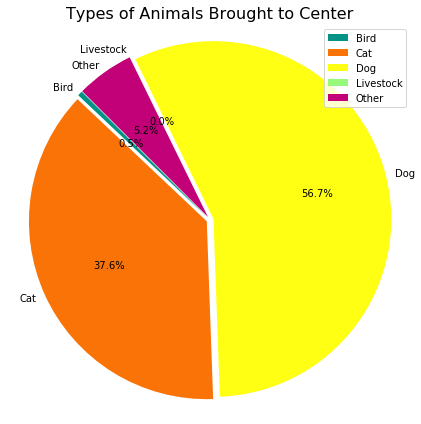

In [17]:
# get value counts for Animal types and sorty by animal type name
animal_types = df_intakes['Animal Type'].value_counts()
animal_types.sort_index(inplace=True)

# create pie chart of animal types
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)
explode = len(animal_types) * (.02, )
ax.pie(animal_types.values, labels=animal_types.index, autopct='%1.1f%%', explode=explode,
       labeldistance=1.05, startangle=135, colors=color)
ax.set_title('Types of Animals Brought to Center', fontsize=16);
ax.legend(loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.savefig('images/intakes_by_animal_type.png')
plt.show()

## What type of dogs are brought into the shelter and for what reasons?

In [22]:
# see number of animals brought in by breed type

# Find the unique number of dog breeds in the combined data. Only looking at the top x number of value counts.
# This will dynamically update to top number of dog breeds analyzed and update the charts.
i = 5

print(f"Number of Unique Breeds (Combined): " + str(len(df_combined[df_combined['Animal Type'] == 'Dog']['Breed'].unique())))
top_percent = round(df_combined[df_combined['Animal Type'] == 'Dog']['Breed'].value_counts(1).head(i).sum(),2)*100
print(f"Percent of Total of Top {i} Breeds (Combined): " + str(top_percent) + "%")

# Remove "Mix" from Breed Names. Duplicates Removed.
stop_words = ["Mix"]
f = lambda x: ' '.join(w for w in x.split() if not w in stop_words)

df_combined_nodup['Breed'] = df_combined_nodup['Breed'].apply(f)

print(f"Number of Unique Breeds (Combined, Cleaned, No Duplicates): " + str(len(df_combined_nodup[df_combined_nodup['Animal Type'] == 'Dog']['Breed'].unique())))
top_percent_nodup = round(df_combined_nodup[df_combined_nodup['Animal Type'] == 'Dog']['Breed'].value_counts(1).head(i).sum(),2)*100
print(f"Percent of Total of Top {i} Breeds (Combined, Cleaned, No Duplicates): " + str(top_percent_nodup) + "%")

# Narrow dataframe to just dogs
dog_combined_nodup = df_combined_nodup.loc[df_combined_nodup['Animal Type'] == 'Dog']

# Parse dogs misted as mixed breeds into one category
def parse_breed(s):
    if bool(re.search('/', s)):
        return 'Mixed Breed'
    else:
        return s

dog_top_parse = dog_combined_nodup['Breed'].apply(parse_breed).value_counts().head(i)
dog_total = len(dog_combined_nodup)
other_dogs = dog_total - dog_top_parse.sum()
other_dogs = pd.Series([other_dogs], index=['Other'])

dog_total_series = dog_top_parse.append(other_dogs)
dog_total_series.head()

Number of Unique Breeds (Combined): 2166
Percent of Total of Top 5 Breeds (Combined): 41.0%
Number of Unique Breeds (Combined, Cleaned, No Duplicates): 1851
Percent of Total of Top 5 Breeds (Combined, Cleaned, No Duplicates): 43.0%


Mixed Breed            7087
Pit Bull               5294
Chihuahua Shorthair    5225
Labrador Retriever     4964
German Shepherd        2230
dtype: int64

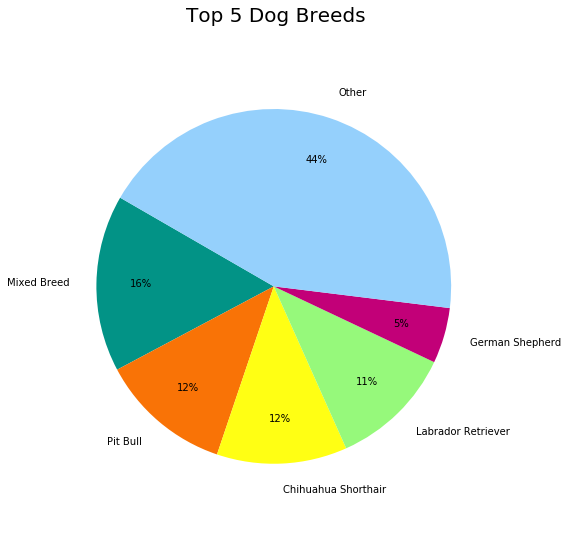

In [21]:
# Plot the Pie Chart
color = ['xkcd:teal', 'xkcd:orange', 'xkcd:yellow','xkcd:light green', 'xkcd:magenta', 'xkcd:light blue']
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
ax.pie(dog_total_series.values, labels=dog_total_series.index, colors=color, autopct='%1.0f%%', labeldistance=1.15, pctdistance=0.75, startangle=150)
ax.set_title(f"Top {i} Dog Breeds", fontsize=20);
plt.axis('equal')
# plt.figtext(0, 0, '*Include a description of other here.', style='italic') 
plt.tight_layout()
plt.savefig("Images/Top_5_Dog_Breeds.png")

In [23]:
# see number of animals brought in by intake type
df_intakes.groupby(['Intake Type'])['Animal ID'].count()

Intake Type
Euthanasia Request      255
Owner Surrender       20347
Public Assist          6672
Stray                 75582
Wildlife               4194
Name: Animal ID, dtype: int64

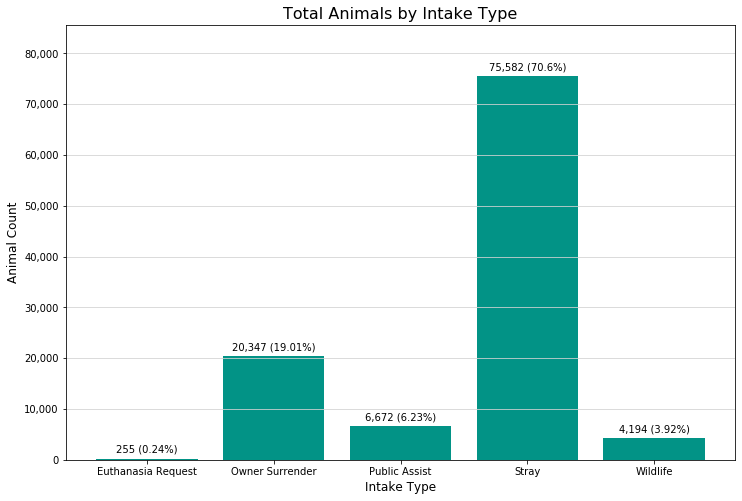

In [24]:
# create bar chart of intake types
intake_types = df_intakes.groupby(['Intake Type'])['Animal ID'].count()

fig, ax = plt.subplots(figsize=(12,8))
x_axis = np.arange(len(intake_types))
# Create a bar chart based upon the above data
plt.bar(x_axis, intake_types, color=color[0])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, intake_types.index)

total_intakes = intake_types.sum()

# annotate chart showing total count and % of all
index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/total_intakes * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(intake_types.values)+10000)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Total Animals by Intake Type", fontsize='16')
plt.xlabel("Intake Type", fontsize='12')
plt.ylabel("Animal Count", fontsize='12')
plt.savefig('images/intakes_by_intake_type.png')
plt.show()

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


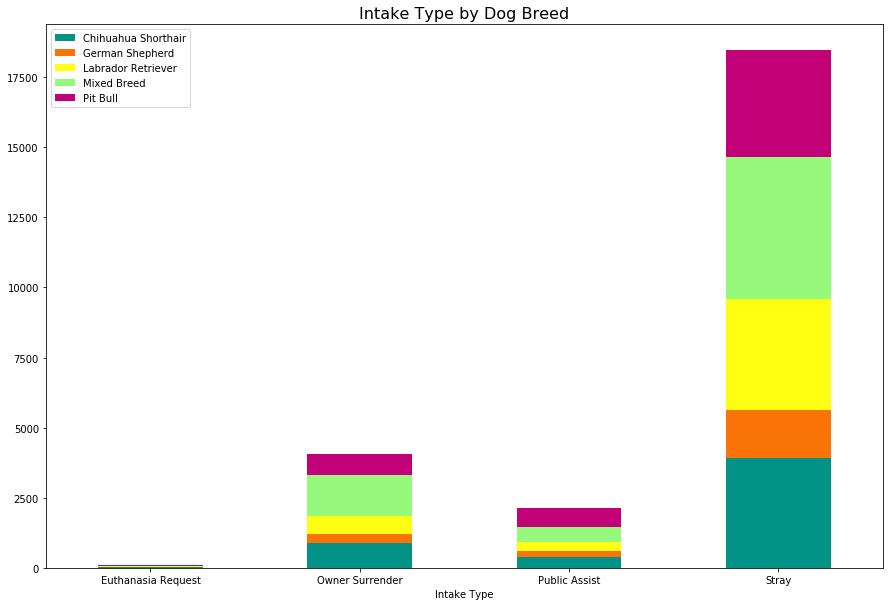

In [29]:
## Intake Type
# Stray                 33231
# Owner Surrender        6896
# Public Assist          3691
# Euthanasia Request      169
# Name: Intake Type, dtype: int64

dog_combined_nodup['Dog Breed'] = dog_combined_nodup['Breed'].apply(parse_breed)
dog_stray = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Stray'].groupby(['Intake Type'])['Dog Breed'].value_counts().head(i)
# dog_stray = dog_stray.iloc[0:i]
# dog_stray_r = dog_stray.sum()
# dog_stray_total
dog_stray

dog_sur = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Owner Surrender'].groupby(['Intake Type'])['Dog Breed'].value_counts().head(i)
dog_sur = dog_sur.iloc[0:i]
dog_sur

dog_pub = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Public Assist'].groupby(['Intake Type'])['Dog Breed'].value_counts().head(i)
dog_pub = dog_pub.iloc[0:i]
dog_pub

dog_euth = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Euthanasia Request'].groupby(['Intake Type'])['Dog Breed'].value_counts().head(i)
dog_euth = dog_euth.iloc[0:i]
dog_euth

intake_type = dog_stray.append(dog_sur).append(dog_pub).append(dog_euth).unstack()
intake_type

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

intake_type.plot.bar(stacked=True, ax=ax, color=color);
plt.xticks(rotation=0)
ax.set_title('Intake Type by Dog Breed', fontsize=16)

# hide the y axis lable
y_axis = ax.yaxis
y_axis.label.set_visible(False)

ax.legend(loc='upper left')
plt.savefig("Images/Intake_Type_by_Dog_Breed.png")
plt.show()

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


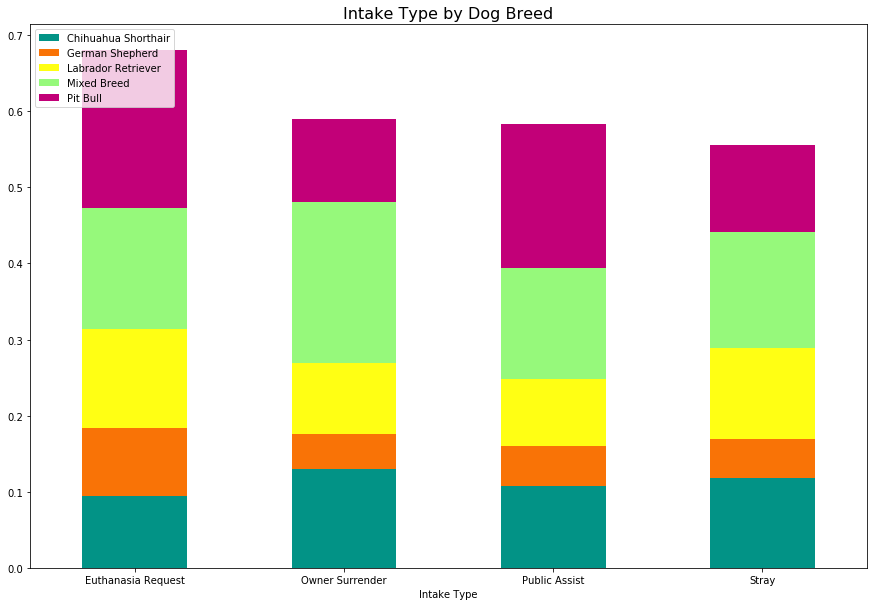

In [30]:
# Owner Surrender        6896
# Public Assist          3691
# Euthanasia Request      169
# Name: Intake Type, dtype: int64

dog_combined_nodup['Dog Breed'] = dog_combined_nodup['Breed'].apply(parse_breed)
dog_stray = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Stray'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
# dog_stray = dog_stray.iloc[0:i]
# dog_stray_r = dog_stray.sum()
# dog_stray_total
dog_stray

dog_sur = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Owner Surrender'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_sur = dog_sur.iloc[0:i]
dog_sur

dog_pub = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Public Assist'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_pub = dog_pub.iloc[0:i]
dog_pub

dog_euth = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Euthanasia Request'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_euth = dog_euth.iloc[0:i]
dog_euth

intake_type = dog_stray.append(dog_sur).append(dog_pub).append(dog_euth).unstack()
intake_type

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

intake_type.plot.bar(stacked=True, ax=ax, color=color);
plt.xticks(rotation=0)
ax.set_title('Intake Type by Dog Breed', fontsize=16)

# hide the y axis lable
y_axis = ax.yaxis
y_axis.label.set_visible(False)

ax.legend(loc='upper left')
plt.savefig("Images/Intake_Type_by_Dog_Breed.png")
plt.show()

## When is an animal most likely to be admitted to the Center?

In [ ]:
# look at intake by by Month and Year
df_intakes.groupby(['Intake Month', 'Intake Year'])['Animal ID'].count().unstack()

In [ ]:
# get intake yearly totals
df_intake_yearly_totals = df_intakes.groupby(['Intake Month', 'Intake Year'])['Animal ID'].count().unstack()

#create bar chart
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Total Intakes Over Time', fontsize='16')
plt.xlabel('Month', fontsize='12')
plt.ylabel('Animal Count', fontsize='12')

plt.grid (b=True,which="both",axis="both",linestyle="-",color="lightgrey")
plt.plot(df_intake_yearly_totals)
plt.xticks(df_intake_yearly_totals.index)
plt.legend(df_intake_yearly_totals.columns)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.savefig('images/intakes_over_time.png')
plt.tight_layout()
plt.show()

In [ ]:
# see how many animals are brought in by condition
df_intakes.groupby(['Intake Condition'])['Animal ID'].count()

In [ ]:
# get intake counts by condition
intake_conditions = df_intakes.groupby(['Intake Condition'])['Animal ID'].count()

# let's plot
fig, ax = plt.subplots(figsize=(12,8))

x_axis = np.arange(len(intake_conditions))
# Create a bar chart based upon the above data
plt.bar(x_axis, intake_conditions, color=color[1])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, intake_conditions.index)

total_intakes = intake_conditions.sum()

index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/total_intakes * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(intake_conditions.values)+10000)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Total Animals by Intake Condition", fontsize='16')
plt.xlabel("Intake Condition", fontsize='12')
plt.ylabel("Animal Count", fontsize='12')
plt.savefig('images/intakes_by_intake_condition.png')
plt.show()


## What are the outcomes for animals brought to the center?

In [ ]:
#look at outcome types
df_outcomes.groupby(['Outcome Type'])['Animal ID'].count()

In [ ]:
# creat outcome types data series
outcome_types = df_outcomes.groupby(['Outcome Type'])['Animal ID'].count()

#plot the series
fig, ax = plt.subplots(figsize=(12,8))

x_axis = np.arange(len(outcome_types))
# Create a bar chart based upon the above data
plt.bar(x_axis, outcome_types, color=color[4])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, outcome_types.index)

total_outcomes = outcome_types.sum()

index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/total_outcomes * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(outcome_types.values)+10000)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Total Animals by Outcome Type", fontsize='16')
plt.xlabel("Outcome Type", fontsize='12')
plt.ylabel("Total Animals", fontsize='12')
plt.savefig('images/outcomes_by_outcome_type.png')
plt.show()

In [ ]:
# let's look at outcomes by month 
df_outcomes.groupby(['Outcome Month'])['Animal ID'].count()

In [ ]:
# get total of outcomes by month
intakes_by_month = df_intakes.groupby(['Intake Month'])['Animal ID'].count()
outcomes_by_month = df_outcomes.groupby(['Outcome Month'])['Animal ID'].count()

# combine intakes by month and outcomes by month into a single dataframe
df_monthly_intakes_outcomes = intakes_by_month.to_frame(name = 'Intakes').join(outcomes_by_month.to_frame(name='Outcomes'))
# df_monthly_intakes_outcomes.index

# create an area chart to compare incomes to outcomes
ax = df_monthly_intakes_outcomes.plot.area(stacked=False, figsize=(15,8)) 

plt.title('Intakes vs. Outcomes by Month', fontsize='16')
plt.xlabel('Month', fontsize='12')
plt.ylabel('Count', fontsize='12')

# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")
plt.xticks(df_monthly_intakes_outcomes.index)

plt.savefig('images/intakes_vs_outcomes_by_month.png')
plt.show()


## Does age play a factor in how quickly a Cat or Dog is adopted?

In [ ]:
df_adoptions = df_combined_deduped.loc[(df_combined_deduped['Outcome Type'] == 'Adoption') & df_combined_deduped['Animal Type'].isin(['Cat', 'Dog'])]
df_adoptions.head()

In [ ]:
groups = df_adoptions.groupby('Animal Type')

# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Days in Center'], group['Intake Age in Months'], marker='o', linestyle='',  alpha=.25, ms=10, label=name)
ax.legend()

plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title('Age Upon Intake (Months) vs Days in Center before Adopted', fontsize=14)
plt.xlabel("Days in Center")
plt.ylabel("Intake Age in Months")

plt.savefig('images/adoption_age_vs_time_in_center.png')
plt.show()

In [ ]:
# create bins for age ranges
bins = [0, 12, 36, 72, 108, 144, 180, 360]
# Create the names for the four bins
group_names = ["< 1 Year", "1-3 Year", "3-6 Years", "6-9 Years", "9-12 Years", "12-15 Years", "> 15 Years"]

# add these items to the df_adoptions
df_adoptions['Intake Age Range'] = pd.cut(df_adoptions['Intake Age in Months'], bins, labels=group_names)
df_adoptions.head()

In [ ]:
df_adoption_age_ranges = df_adoptions.groupby(['Animal Type', 'Intake Age Range'])['Days in Center'].mean().reset_index()

In [ ]:
x_axis = df_adoption_age_ranges[df_adoption_age_ranges['Animal Type'] == 'Cat']['Intake Age Range']
cats_data = df_adoption_age_ranges[df_adoption_age_ranges['Animal Type'] == 'Cat']['Days in Center']
dogs_data = df_adoption_age_ranges[df_adoption_age_ranges['Animal Type'] == 'Dog']['Days in Center']

ind = np.arange(len(x_axis))  # the x locations for the groups

#plot hbar chart
fig, ax = plt.subplots(figsize=(12,8))
width = .35
rects = ax.barh(ind - width/2, cats_data, width, label='Cat')

rects2 = ax.barh(ind + width/2, dogs_data, width, label='Dog')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Age Range', fontsize=12)
ax.set_xlabel('Avg Days in Center', fontsize=12)
ax.set_title('Average Days in Center by Age Range', fontsize=16)
ax.set_yticks(ind)
ax.set_yticklabels(x_axis)

# show grid lines on y axis
ax.grid(b=True,which="both",axis="x",linestyle="-",color="lightgray")
ax.legend(loc='lower right')

plt.savefig('images/avg_days_by_age_range.png')
plt.show()